<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt


In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.configuration()

Library,Version
OS,nt [win32]
Python,"3.9.5 (tags/v3.9.5:0a7dcbd, May 3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]"
IPython,7.23.1
MatPlotLib,3.4.1
Numpy,1.20.2
pyAgrum,0.20.2.9


# Credal Net from BN

In [3]:
bn=gum.fastBN("A->B[3]->C<-D<-A->E->F")
bn_min=gum.BayesNet(bn)
bn_max=gum.BayesNet(bn)
for n in bn.nodes():
  x=0.4*min(bn.cpt(n).min(),1-bn.cpt(n).max())
  bn_min.cpt(n).translate(-x)
  bn_max.cpt(n).translate(x)
    
cn=gum.CredalNet(bn_min,bn_max)
cn.intervalToCredal()

gnb.sideBySide(bn.cpt("B"),bn_min.cpt("B"),bn_max.cpt("B"))
cn

(gum::credal::CredalNet<double>@0000016BE5C96DB0) 
A[0,1]
<> : [[0.351981 , 0.648019] , [0.722279 , 0.277721]]

B[0,2]
<A:0> : [[0.25447 , 0.190733 , 0.554797] , [0.25447 , 0.232908 , 0.512621] , [0.296648 , 0.232908 , 0.470443] , [0.338824 , 0.190733 , 0.470443] , [0.296646 , 0.148557 , 0.554797] , [0.338824 , 0.148557 , 0.51262]]
<A:1> : [[0.063263 , 0.402169 , 0.534568] , [0.063263 , 0.444343 , 0.492394] , [0.10544 , 0.444343 , 0.450216] , [0.147615 , 0.402169 , 0.450216] , [0.105441 , 0.359991 , 0.534568] , [0.147615 , 0.359991 , 0.492394]]

C[0,1]
<B:0|D:0> : [[0.59738 , 0.40262] , [0.611024 , 0.388976]]
<B:1|D:0> : [[0.976124 , 0.0238764] , [0.989766 , 0.0102339]]
<B:2|D:0> : [[0.803011 , 0.196989] , [0.816655 , 0.183345]]
<B:0|D:1> : [[0.467401 , 0.532599] , [0.481046 , 0.518954]]
<B:1|D:1> : [[0.132539 , 0.867461] , [0.146182 , 0.853818]]
<B:2|D:1> : [[0.122751 , 0.877249] , [0.136396 , 0.863604]]

D[0,1]
<A:0> : [[0.154426 , 0.845574] , [0.328509 , 0.671491]]
<A:1> : [[0.130564 , 0.869436] , [0.304649 , 0.695351]]

E[0,1]
<A:0> : [[0.342914 , 0.657086] , [0.718393 , 0.281607]]
<A:1> : [[0.295168 , 0.704832] , [0.670644 , 0.329356]]

F[0,1]
<E:0> : [[0.268144 , 0.731856] , [0.463209 , 0.536791]]
<E:1> : [[0.146298 , 0.853702] , [0.341361 , 0.658639]]

#### We can use LBP on CN (L2U) only for binary credal networks (here B is not binary). We then propose the classical binarization (but warn the user that this leads to approximation in the inference)

In [4]:
cn2=gum.CredalNet(bn_min,bn_max)
cn2.intervalToCredal()
cn2.approximatedBinarization()
cn2.computeBinaryCPTMinMax()

gnb.sideBySide(cn,cn2)

Here, $B$ becomes 
- $B$-b$i$ : the $i$-th bit of B
- instrumental $B$-v$k$ : the indicator variable for each modality $k$ of $B$

In [5]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie2_lbp=gum.CNLoopyPropagation(cn2)
ie2_mc=gum.CNMonteCarloSampling(cn2)

In [6]:
gnb.sideBySide(gnb.getInference(cn,engine=ie_mc),gnb.getInference(cn2,engine=ie2_mc),gnb.getInference(cn2,engine=ie2_lbp))

In [7]:
gnb.sideBySide(ie_mc.CN(),ie_mc.marginalMin("F"),ie_mc.marginalMax("F"))
gnb.sideBySide(ie_mc.CN(),ie2_lbp.marginalMin("F"),ie2_lbp.marginalMax("F"))
print(cn)


A[0,1]
<> : [[0.351981 , 0.648019] , [0.722279 , 0.277721]]

B[0,2]
<A:0> : [[0.25447 , 0.190733 , 0.554797] , [0.25447 , 0.232908 , 0.512621] , [0.296648 , 0.232908 , 0.470443] , [0.338824 , 0.190733 , 0.470443] , [0.296646 , 0.148557 , 0.554797] , [0.338824 , 0.148557 , 0.51262]]
<A:1> : [[0.063263 , 0.402169 , 0.534568] , [0.063263 , 0.444343 , 0.492394] , [0.10544 , 0.444343 , 0.450216] , [0.147615 , 0.402169 , 0.450216] , [0.105441 , 0.359991 , 0.534568] , [0.147615 , 0.359991 , 0.492394]]

C[0,1]
<B:0|D:0> : [[0.59738 , 0.40262] , [0.611024 , 0.388976]]
<B:1|D:0> : [[0.976124 , 0.0238764] , [0.989766 , 0.0102339]]
<B:2|D:0> : [[0.803011 , 0.196989] , [0.816655 , 0.183345]]
<B:0|D:1> : [[0.467401 , 0.532599] , [0.481046 , 0.518954]]
<B:1|D:1> : [[0.132539 , 0.867461] , [0.146182 , 0.853818]]
<B:2|D:1> : [[0.122751 , 0.877249] , [0.136396 , 0.863604]]

D[0,1]
<A:0> : [[0.154426 , 0.845574] , [0.328509 , 0.671491]]
<A:1> : [[0.130564 , 0.869436] , [0.304649 , 0.695351]]

E[0,1]
<A:

## Credal Net from bif files

In [8]:
cn=gum.CredalNet("res/cn/2Umin.bif","res/cn/2Umax.bif")
cn.intervalToCredal()

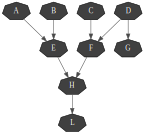

In [9]:
gnb.showCN(cn,"2")

In [10]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertEvidenceFile("res/cn/L2U.evi")

In [11]:
ie.setRepetitiveInd(False)
ie.setMaxTime(1)
ie.setMaxIter(1000)

ie.makeInference()

In [12]:
gnb.sideBySide(cn,gnb.getInference(cn,targets={"A","H","L","D"},engine=ie,evs={"L":[0,1],"G":[1,0]}))

# Comparing inference in credal networks

In [13]:
import pyAgrum as gum

def showDiffInference(model,mc,lbp):
    for i in model.current_bn().nodes():
        a,b=mc.marginalMin(i)[:]
        c,d=mc.marginalMax(i)[:]
        
        e,f=lbp.marginalMin(i)[:]
        g,h=lbp.marginalMax(i)[:]
        
        plt.scatter([a,b,c,d],[e,f,g,h])
        

cn=gum.CredalNet("res/cn/2Umin.bif","res/cn/2Umax.bif")
cn.intervalToCredal()

#### The two inference give quite the same result

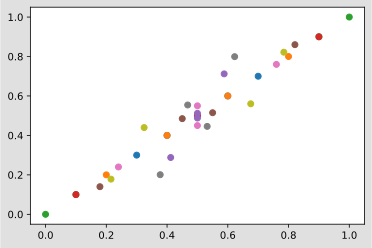

In [14]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.makeInference()

cn.computeBinaryCPTMinMax()
ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)

#### but not when evidence are inserted

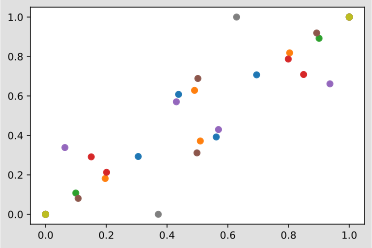

In [15]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.insertEvidenceFile("res/cn/L2U.evi")
ie_mc.makeInference()

ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.insertEvidenceFile("res/cn/L2U.evi")
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)


## Dynamical Credal Net

In [16]:
cn=gum.CredalNet("res/cn/bn_c_8.bif","res/cn/den_c_8.bif")
cn.bnToCredal(0.8,False)

In [17]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(True)
ie.setMaxTime(30)
ie.setMaxIter(1000)

ie.makeInference()

In [18]:
print(ie.dynamicExpMax("temp"))

(13.796595325898947, 11.817699847864338, 11.880707481299204, 11.845957195973266, 11.832343590421114, 11.838440247998115, 11.837182337197266, 11.83727595089036, 11.837309606952806)


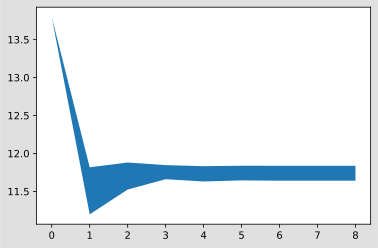

In [19]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))

In [20]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(False)
ie.setMaxTime(30)
ie.setMaxIter(1000)

ie.makeInference()


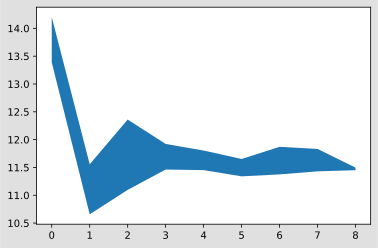

In [21]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))

stopped with epsilon=0


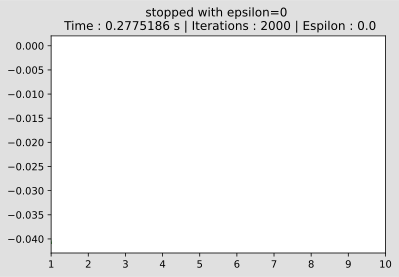

In [22]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(False)
ie.setMaxTime(30)
ie.setMaxIter(5000)

gnb.animApproximationScheme(ie)
ie.makeInference()
print(ie.messageApproximationScheme())

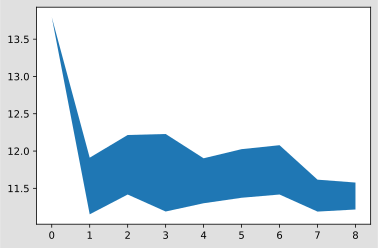

In [23]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"));